# Regresión Logística


### Skills For Industry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/titanic.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


## Definición de las Columnas

PassengerId	= Passenger Id	
Survived =	Survival people	0 = No, 1 = Yes
Pclass	= Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
Name	= Name	
Sex	= Sex	
Age	= Age	
SibSp	= # of siblings / spouses aboard the Titanic	
Parch	= # of parents / children aboard the Titanic	
Ticket	= Ticket number	
Fare	= Passenger fare	
Cabin	= Cabin number	
Embarked	= Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southamp

## Preparación de Datos

In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [ ]:
# porcentaje de datos nulos
def missing_percentage(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent
nan_percent= missing_percentage(df)
print(nan_percent)

Fare         0.076394
Embarked     0.152788
Age         20.091673
Cabin       77.463713
dtype: float64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fare'),
  Text(1, 0, 'Embarked'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Cabin')])

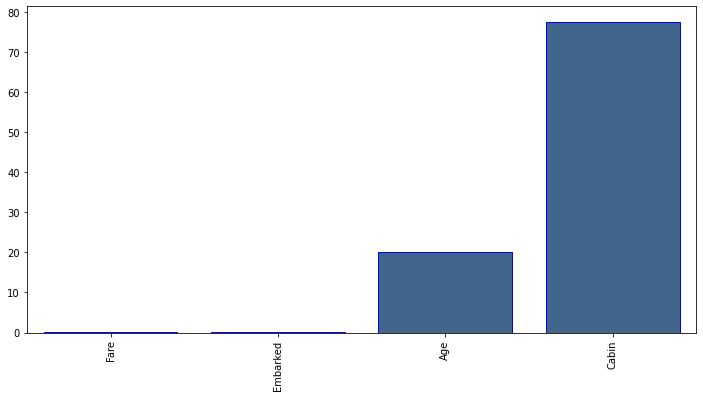

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent, color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(rotation=90)


In [ ]:
# eliminamos la comula con muchos datos nuls
df = df.drop(['Cabin'],axis=1)

In [ ]:
# eliminamos los registros que tengan valores faltantes 
df = df.dropna(subset = ["Embarked"])
df = df.dropna(subset = ["Fare"])

In [ ]:
#llenando los valores nulos
df['Age'] = df.groupby(['Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))


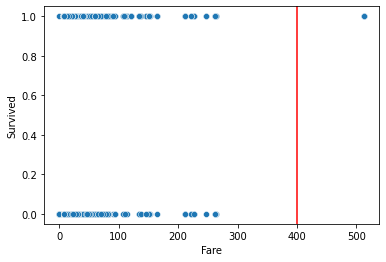

In [ ]:
sns.scatterplot(data=df,x='Fare', y='Survived')
plt.axvline(x=400,color='r')

In [ ]:
#Eliminación de outliers
index_drop=df[(df['Fare']>300) & (df['Survived']==1)].index
df = df.drop(index_drop, axis=0)

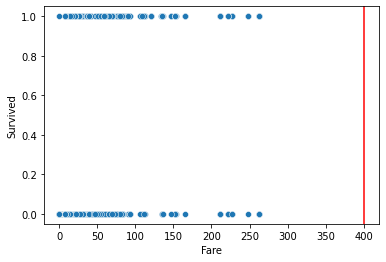

In [ ]:
sns.scatterplot(data=df,x='Fare', y='Survived')
plt.axvline(x=400,color='r')

In [ ]:
#correlación rápida
# The Correlation overview

df.corr()['Survived'].sort_values()

Pclass     -0.257597
Age        -0.063582
SibSp       0.004943
Parch       0.109535
Fare        0.228595
Survived    1.000000
Name: Survived, dtype: float64

In [ ]:
df.corr()['Survived'].sort_values()


Pclass     -0.257597
Age        -0.063582
SibSp       0.004943
Parch       0.109535
Fare        0.228595
Survived    1.000000
Name: Survived, dtype: float64

In [ ]:
df = df.drop(['SibSp'],axis=1)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1302 non-null   int64  
 1   Pclass    1302 non-null   int64  
 2   Sex       1302 non-null   object 
 3   Age       1302 non-null   float64
 4   Parch     1302 non-null   int64  
 5   Fare      1302 non-null   float64
 6   Embarked  1302 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 81.4+ KB


## EDA

In [ ]:
df['Survived'].value_counts()


0    814
1    488
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

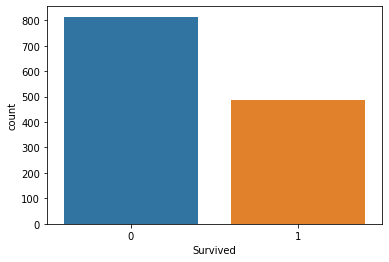

In [ ]:
sns.countplot(data=df, x='Survived')


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

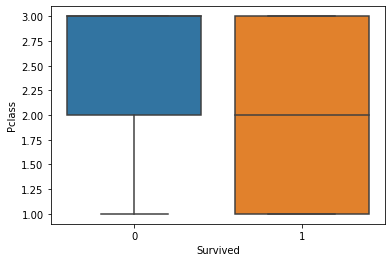

In [ ]:
sns.boxplot(data=df, x='Survived', y='Pclass')     


<Figure size 6400x6400 with 0 Axes>

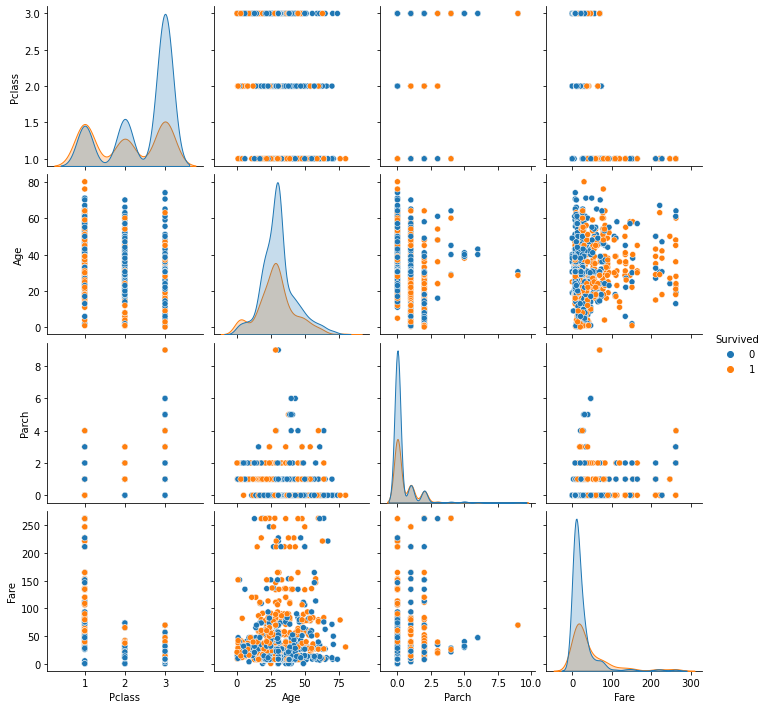

In [ ]:
fig= plt.figure(figsize=(8,8), dpi=800)
sns.pairplot(df, hue='Survived')

<AxesSubplot:>

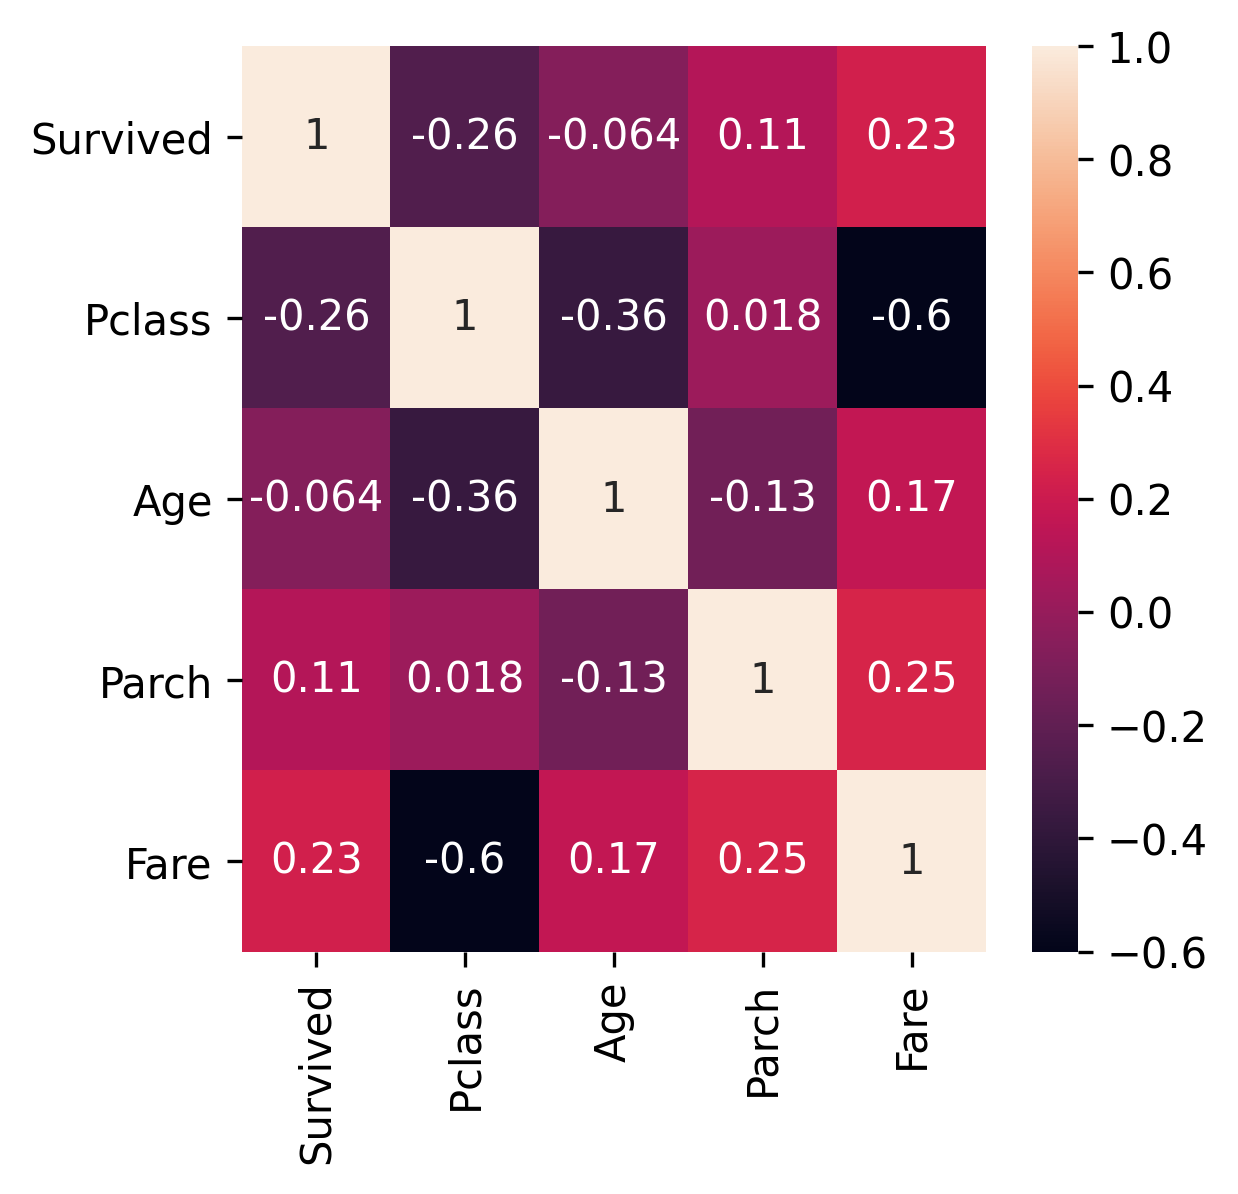

In [ ]:
fig= plt.figure(figsize=(4,4), dpi=300)
sns.heatmap(df.corr(), annot=True)

## Separación de Caracteristicas y numero de categorias

In [ ]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

## Determinación de las características y la variable de destino

In [ ]:
X= df_num.drop('Survived', axis=1)
y= df_num['Survived']

## División del conjunto de datos en el conjunto Tain & Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Escalamiento de caracteristicas 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

## Entrenamiento del modelo (regresión logística)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [ ]:
# coeficiente del modelo
log_model.coef_

array([[-0.61431778, -0.34994119,  0.16936526,  0.10670527]])

## Predicción de datos de prueba

In [ ]:
y_pred= log_model.predict(scaled_X_test)


## Evaluating the Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)


0.7164750957854407

In [ ]:
confusion_matrix(y_test, y_pred)


array([[149,  22],
       [ 52,  38]], dtype=int64)

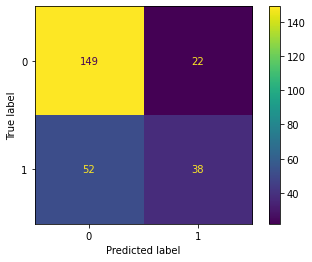

In [ ]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80       171
           1       0.63      0.42      0.51        90

    accuracy                           0.72       261
   macro avg       0.69      0.65      0.65       261
weighted avg       0.70      0.72      0.70       261



## Entrenamiento del modelo (regresión logística mediante validación cruzada)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
scaled_X= scaler.transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log_model2= LogisticRegressionCV(cv=5, random_state=101).fit(scaled_X, y) 
y_pred= log_model2.predict(scaled_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
accuracy_score(y, y_pred)


0.6897081413210445

In [ ]:
confusion_matrix(y, y_pred)


array([[721,  93],
       [311, 177]], dtype=int64)

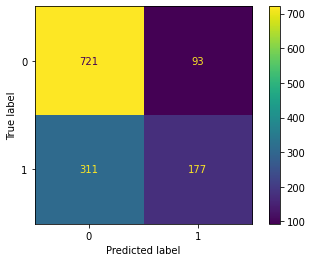

In [ ]:
plot_confusion_matrix(log_model2, scaled_X, y)


In [ ]:
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.89      0.78       814
           1       0.66      0.36      0.47       488

    accuracy                           0.69      1302
   macro avg       0.68      0.62      0.62      1302
weighted avg       0.68      0.69      0.66      1302



## Comparación de la función LogisticRegression con la función LogisticRegressionCV

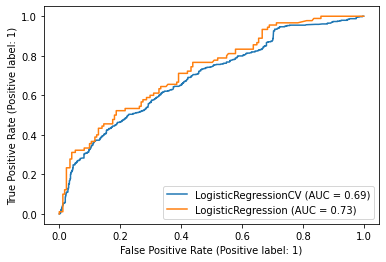

In [ ]:
from sklearn.metrics import plot_roc_curve
figure1 = plot_roc_curve(log_model2, scaled_X, y)
figure2 = plot_roc_curve(log_model, scaled_X_test, y_test, ax=figure1.ax_)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [5, 3]